<a href="https://colab.research.google.com/github/nitinranjansharma/EVA5B2/blob/main/s7/s7_workflow_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
## importing and transforming data
from read_inputs import read_transform_inputs
trainset, trainloader, testset, testloader, classes = read_transform_inputs()

Files already downloaded and verified
Files already downloaded and verified


  cat truck   cat  ship


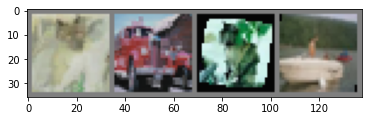

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
## defining model

from define_model import Net
!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 34, 34]             432
              ReLU-2           [-1, 16, 34, 34]               0
       BatchNorm2d-3           [-1, 16, 34, 34]              32
            Conv2d-4           [-1, 32, 34, 34]           4,608
              ReLU-5           [-1, 32, 34, 34]               0
       BatchNorm2d-6           [-1, 32, 34, 34]              64
         MaxPool2d-7           [-1, 32, 17, 17]               0
            Conv2d-8           [-1, 32, 17, 17]             320
            Conv2d-9           [-1, 64, 17, 17]           2,112
        MaxPool2d-10             [-1, 64, 8, 8]               0
           Conv2d-11            [-1, 128, 8, 8]          73,728
             ReLU-12            [-1, 128, 8, 8]               0
      BatchNorm2d-13            [-1, 128, 8, 8]             256
        MaxPool2d-14            [-1

In [ ]:
##defining optimiser
from define_optim import optim_define
optimizer = optim_define(model)

In [ ]:
## defining accuracy check and defining the training class
from truth_checker import truth_checker
from training_class import training_class
clf = training_class(model=model,trainloader = trainloader,testloader= testloader,device=device,
                     epoch=1,optimizer=optimizer)

In [ ]:
## training process initiation
from train_iteration import train
criterion = nn.CrossEntropyLoss()
train(1,trainloader,device,optimizer,model,criterion)

0
[1,  2000] loss: 1.553
[1,  4000] loss: 1.515
[1,  6000] loss: 1.508
[1,  8000] loss: 1.495
[1, 10000] loss: 1.502
[1, 12000] loss: 1.472
Finished Training


GroundTruth:    cat  ship  ship plane


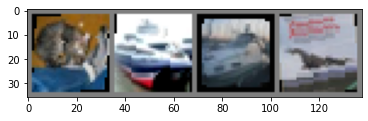

In [ ]:
## checking test images

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
from accuracy_check import check_accuracy     
check_accuracy(testloader,device,model)